In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

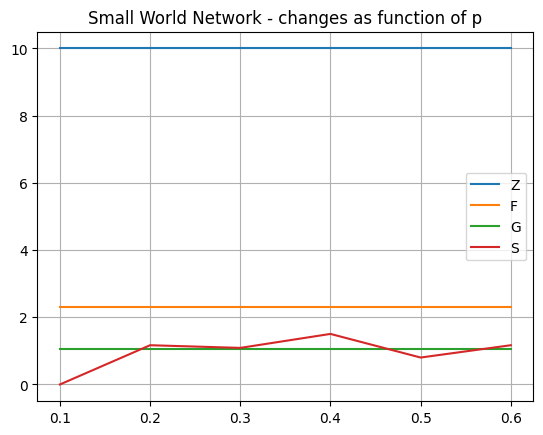

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
[-0.0, 1.1682824501765625, 1.0888999753452238, 1.5047882836811908, 0.8018185525433372, 1.1682824501765625]


In [6]:
# small world network
p_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
N_vals = [9, 10]
S = []
F = []
G = []
Z = []
for p in p_vals:
  F1 = []
  for N in N_vals:
     smallworld = nx.watts_strogatz_graph(N, 5, p, seed=None)
     A = nx.adjacency_matrix(smallworld, nodelist=None, dtype=None, weight='weight').toarray()
     Z1 = np.trace(np.exp(A))
     F1.append(np.log(Z1))
  Z.append(Z1)
  F.append(F1[1]) 
  G.append((F1[1] - F1[0])*N_vals[1])
  degree_histogram = nx.degree_histogram(smallworld)
  prob_distribution = [count / N for count in degree_histogram if count > 0]
  S.append(-np.sum([pr * np.log(pr) for pr in prob_distribution if pr > 0]))
plt.plot(p_vals, Z, label = "Z")
plt.plot(p_vals, F, label = "F")
plt.plot(p_vals, G, label = "G")
plt.plot(p_vals, S, label = "S")
plt.legend()
plt.grid(True)
plt.title("Small World Network - changes as function of p")
plt.show()
print(p_vals)
print(S)


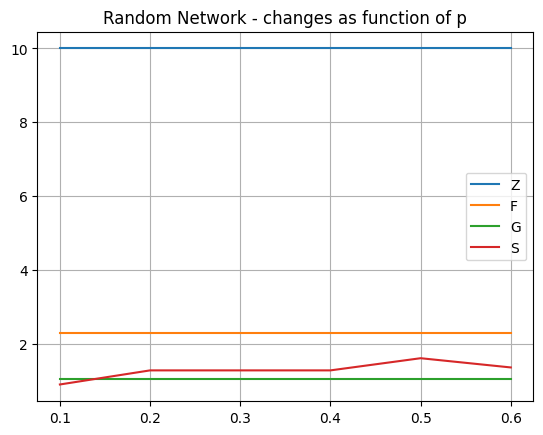

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
[0.8979457248567797, 1.2798542258336676, 1.2798542258336676, 1.2798542258336674, 1.6094379124341, 1.3592367006650063]


In [5]:
p_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
N_vals = [9, 10]
S = []
F = []
G = []
Z = []
for p in p_vals:
  F1 = []
  for N in N_vals:
     Egraph = nx.erdos_renyi_graph(N, p)
     A = nx.adjacency_matrix(Egraph, nodelist=None, dtype=None, weight='weight').toarray()
     Z1 = np.trace(np.exp(A))
     F1.append(np.log(Z1))
  Z.append(Z1)
  F.append(F1[1])
  G.append((F1[1] - F1[0])*N_vals[1])
  degree_histogram = nx.degree_histogram(Egraph)
  prob_distribution = [count / N for count in degree_histogram if count > 0]
  S.append(-np.sum([pr * np.log(pr) for pr in prob_distribution if pr > 0]))
plt.plot(p_vals, Z, label = "Z")
plt.plot(p_vals, F, label = "F")
plt.plot(p_vals, G, label = "G")
plt.plot(p_vals, S, label = "S")
plt.legend()
plt.grid(True)
plt.title("Random Network - changes as function of p")
plt.show()
print(p_vals)
print(S)

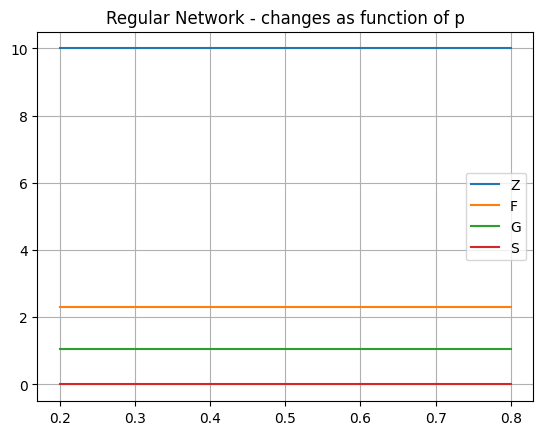

[0.2 0.4 0.6 0.8]
[-0.0, -0.0, -0.0, -0.0]


In [3]:
# regular network
d_vals = [2, 4, 6, 8]
N_vals = [9, 10]
p_vals = np.zeros(len(d_vals))
# p = d/N
N = 10
S = []
F = []
G = []
Z = []
for d in d_vals:
  F1 = []
  for N in N_vals:
     Rgraph = nx.random_regular_graph(d, N)
     A = nx.adjacency_matrix(Rgraph, nodelist=None, dtype=None, weight='weight').toarray()
     Z1 = np.trace(np.exp(A))
     F1.append(np.log(Z1))
  Z.append(Z1)
  F.append(F1[1])
  G.append((F1[1] - F1[0])*N_vals[1])
  degree_histogram = nx.degree_histogram(Rgraph)
  prob_distribution = [count / N for count in degree_histogram if count > 0]
  S.append(-np.sum([pr * np.log(pr) for pr in prob_distribution if pr > 0]))
for i in range(len(d_vals)):
   p_vals[i] = d_vals[i]/N
plt.plot(p_vals, Z, label = "Z")
plt.plot(p_vals, F, label = "F")
plt.plot(p_vals, G, label = "G")
plt.plot(p_vals, S, label = "S")
plt.legend()
plt.grid(True)
plt.title("Regular Network - changes as function of p")
plt.show()
print(p_vals)
print(S)